In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

graph_path = "/content/roadNet-TX.txt"
originalG = nx.read_edgelist(graph_path)

G = nx.read_edgelist(graph_path)
sampled_nodes = random.sample(list(G.nodes()), 5000)

sampled_graph = G.subgraph(sampled_nodes)

sample_edge_count = 5000

sampled_edges = random.sample(list(originalG.edges()), min(sample_edge_count, originalG.number_of_edges()))

sampled_nodes = set()
for edge in sampled_edges:
    sampled_nodes.add(edge[0])
    sampled_nodes.add(edge[1])

G = originalG.edge_subgraph(sampled_edges)

print("Nodes in sample: ", G.number_of_nodes())
print("Edges in sample: ", G.number_of_edges())

Nodes in sample:  9875
Edges in sample:  5000


In [4]:
# Function to find the giant component
def find_giant_component(G):
    # Get connected components
    components = sorted(nx.connected_components(G), key=len, reverse=True)

    # Return the largest component
    giant_component = components[0] if components else set()

    return giant_component

# Function to compute basic statistics
def compute_basic_statistics(G):
    # Number of nodes
    num_nodes = G.number_of_nodes()

    # Number of edges
    num_edges = G.number_of_edges()

    # Average degree
    avg_degree = sum(dict(G.degree()).values()) / num_nodes

    return num_nodes, num_edges, avg_degree

# Assuming G is your network
# Find the giant component
giant_component = find_giant_component(G)

# Compute basic statistics
num_nodes, num_edges, avg_degree = compute_basic_statistics(G)

# Print basic statistics
print("Basic Statistics:")
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Average degree:", avg_degree)

# Print size of the giant component
print("Size of the Giant Component:", len(giant_component))

# Print the nodes of the giant component
print("Nodes of the Giant Component:")
print(giant_component)


Basic Statistics:
Number of nodes: 9875
Number of edges: 5000
Average degree: 1.0126582278481013
Size of the Giant Component: 5
Nodes of the Giant Component:
{'247211', '247233', '247210', '248785', '248784'}


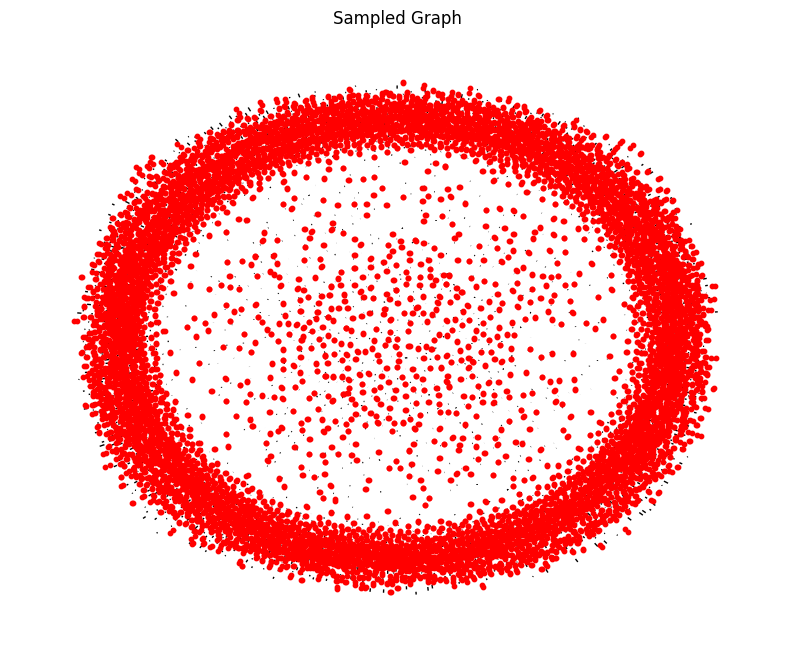

In [ ]:
plt.figure(figsize=(10, 8))

# Draw edges
nx.draw_networkx_edges(G, pos=nx.spring_layout(G), edge_color='black')

# Draw nodes
nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color='red', node_size=10)
G
plt.title("Sampled Graph")
plt.axis("off")
plt.show()

Maximum Degree: 2
Minimum Degree: 1
Average Degree: 1.0080645161290323
Standard Deviation of Degree: 0.08943981053555984


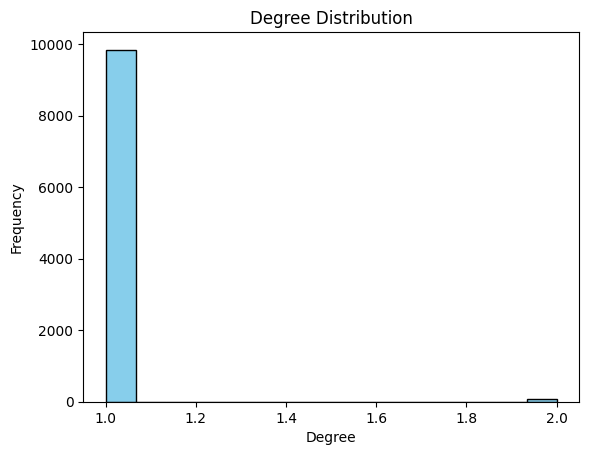

In [ ]:
degree_sequence = [d for n, d in G.degree()]

# Compute statistics
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
avg_degree = np.mean(degree_sequence)
std_dev_degree = np.std(degree_sequence)

print("Maximum Degree:", max_degree)
print("Minimum Degree:", min_degree)
print("Average Degree:", avg_degree)
print("Standard Deviation of Degree:", std_dev_degree)

# Visualize degree distribution
plt.hist(degree_sequence, bins='auto', color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(G)

# Calculate average degree centrality
avg_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
print("Average Degree Centrality:", avg_degree_centrality)

# Find the top 10 nodes with highest degree centrality
print("\nThe nodes with the highest degree centrality\n")
top_10_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

#Display the top 10 nodes and their centrality values in a table format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Degree Centrality'])
print(df)

Average Degree Centrality: 0.00010162965179240545

The nodes with the highest degree centrality

     Node  Degree Centrality
0  491113           0.000202
1  356936           0.000202
2  127141           0.000202
3   53651           0.000202
4  335379           0.000202
5  341696           0.000202
6  173997           0.000202
7  462742           0.000202
8   38401           0.000202
9  337847           0.000202


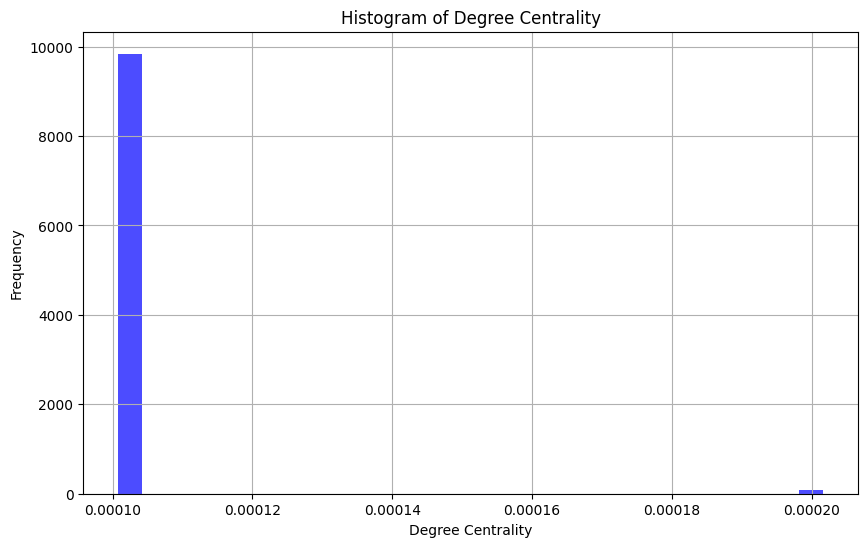

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality.values(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Degree Centrality')
plt.grid(True)
plt.show()

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

avg_eigenvector_centrality = sum(eigenvector_centrality.values()) / len(eigenvector_centrality)
print("Average Eigenvector Centrality:", avg_eigenvector_centrality)

top_10_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Step 4: Display the top 10 nodes and their centrality values in a table format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Eigenvector Centrality'])
print(df)

Average Eigenvector Centrality: 0.0015435265444272946
     Node  Eigenvector Centrality
0  491113                0.079057
1  356936                0.079057
2  127141                0.079057
3   53651                0.079057
4  335379                0.079057
5  341696                0.079057
6  173997                0.079057
7  462742                0.079057
8   38401                0.079057
9  337847                0.079057


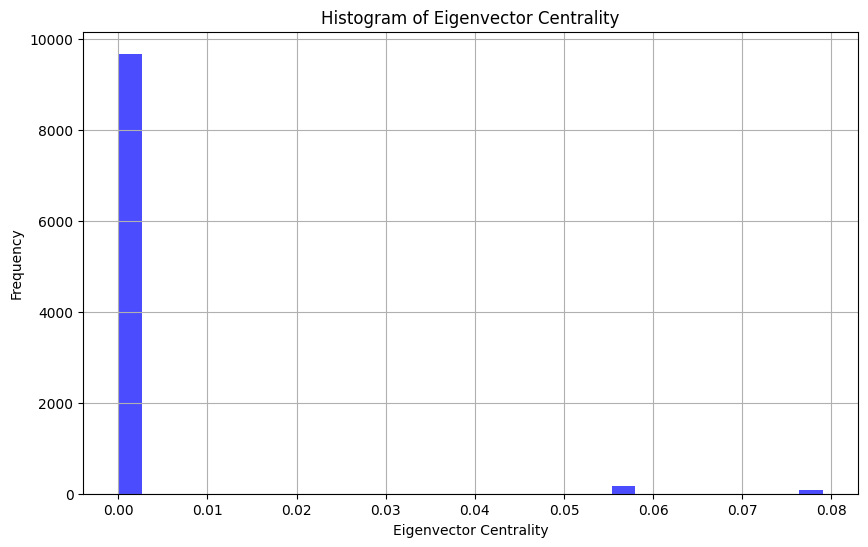

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_centrality.values(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Eigenvector Centrality')
plt.grid(True)
plt.show()

In [ ]:
pagerank_centrality = nx.pagerank(G)

# Calculate average PageRank centrality
avg_pagerank_centrality = sum(pagerank_centrality.values()) / len(pagerank_centrality)

#  Get the top 10 nodes with highest PageRank centrality
top_10_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 nodes and their centrality values in a table format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'PageRank Centrality'])
print(df)

# Print the average PageRank centrality
print("Average PageRank Centrality:", avg_pagerank_centrality)

     Node  PageRank Centrality
0  491113             0.000176
1  356936             0.000176
2  127141             0.000176
3   53651             0.000176
4  335379             0.000176
5  341696             0.000176
6  173997             0.000176
7  462742             0.000176
8   38401             0.000176
9  337847             0.000176
Average PageRank Centrality: 0.00010080645161291682


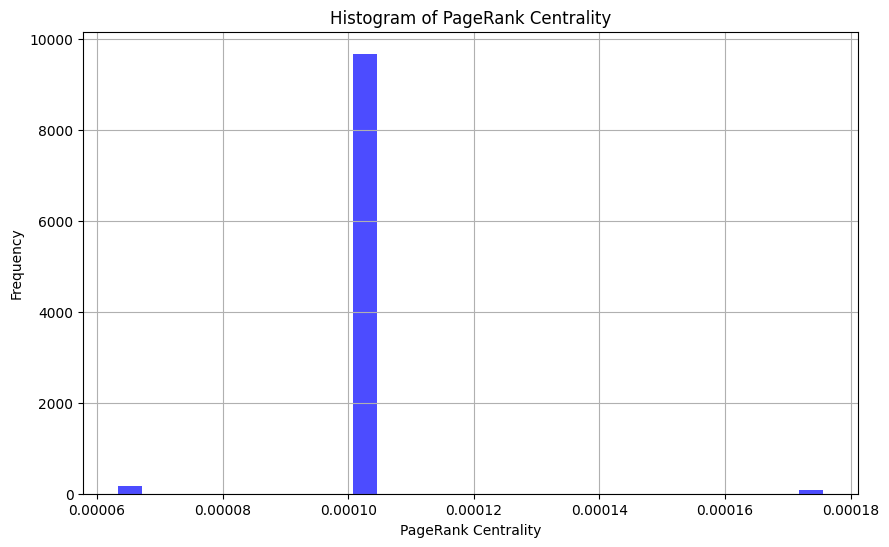

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(pagerank_centrality.values(), bins=30, color='blue', alpha=0.7)
plt.xlabel('PageRank Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of PageRank Centrality')
plt.grid(True)
plt.show()

In [ ]:
alpha = 0.1  # Adjust the damping factor as needed
beta = 1 / (max(dict(G.degree()).values()) + 1)  # Normalize beta by the maximum degree in the graph
n = len(G)
I = np.identity(n)
A = nx.to_numpy_array(G)
katz_centrality = np.linalg.inv(I - alpha * A.T) @ np.ones(n) * beta

#  Get the top 10 nodes with highest Katz centrality
top_10_indices = np.argsort(katz_centrality)[::-1][:10]
top_10_nodes = [(list(G.nodes())[i], katz_centrality[i]) for i in top_10_indices]

# Display the top 10 nodes and their centrality values in a tabular format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Katz Centrality'])
print(df)

     Node  Katz Centrality
0  151729         0.408163
1  469286         0.408163
2  423531         0.408163
3   38401         0.408163
4   88340         0.408163
5   54014         0.408163
6   94783         0.408163
7  128590         0.408163
8  177837         0.408163
9  313676         0.408163


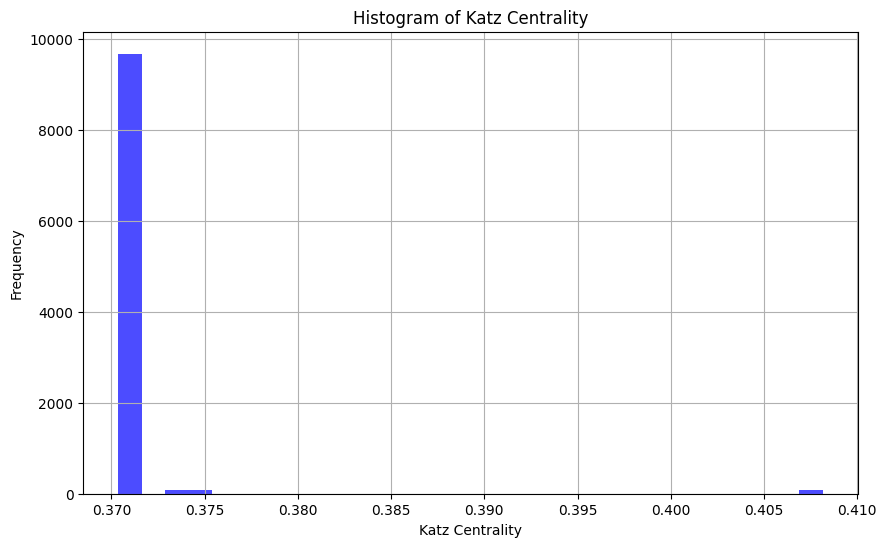

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(katz_centrality, bins=30, color='blue', alpha=0.7)
plt.xlabel('Katz Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Katz Centrality')
plt.grid(True)
plt.show()

In [ ]:
global_clustering_coefficient = nx.average_clustering(G)

# Calculate the local clustering coefficients for all nodes
local_clustering_coefficients = nx.clustering(G)

# Calculate the average local clustering coefficient
average_local_clustering_coefficient = sum(local_clustering_coefficients.values()) / len(local_clustering_coefficients)

#  Display the global and average local clustering coefficients
print("Global Clustering Coefficient:", global_clustering_coefficient)
print("Average Local Clustering Coefficient:", average_local_clustering_coefficient)

#print("Local Clustering: ", local_clustering_coefficients)

highest_local_clustering_nodes = sorted(local_clustering_coefficients.items(), key=lambda x: x[1], reverse=True)[:10]

#  Display the nodes and their local clustering coefficients in a tabular format
df = pd.DataFrame(highest_local_clustering_nodes, columns=['Node', 'Local Clustering Coefficient'])
print(df)

Global Clustering Coefficient: 0.0
Average Local Clustering Coefficient: 0.0
     Node  Local Clustering Coefficient
0  114457                             0
1   24704                             0
2   69484                             0
3   86883                             0
4   19258                             0
5   70973                             0
6   59656                             0
7   97981                             0
8   92602                             0
9   22238                             0


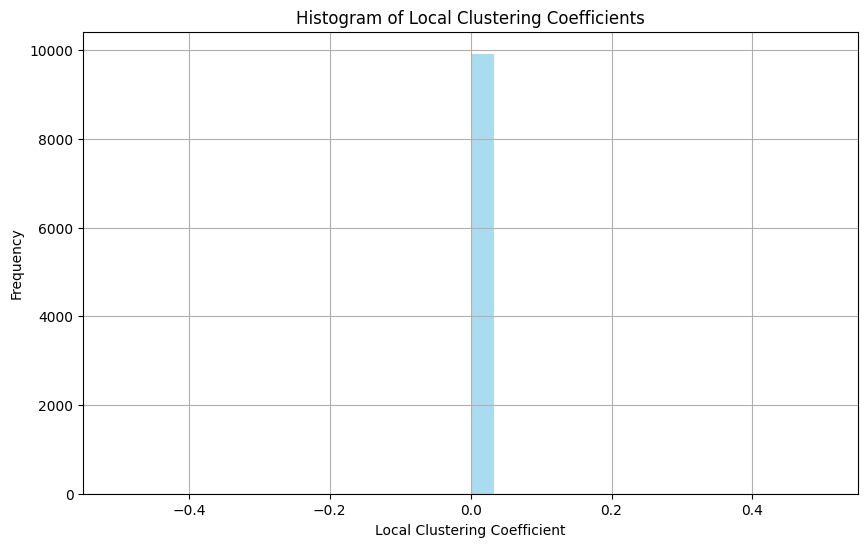

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(list(local_clustering_coefficients.values()), bins=30, color='skyblue', alpha=0.7)
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Local Clustering Coefficients')
plt.grid(True)
plt.show()

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

# Step 3: Get the top 10 nodes with the highest betweenness centrality
top_10_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

#  Display the top 10 nodes and their betweenness centrality values in a tabular format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Betweenness Centrality'])
print(df)

     Node  Betweenness Centrality
0  125506            6.091636e-08
1  358111            6.091636e-08
2  335261            2.030545e-08
3  125216            2.030545e-08
4  143224            2.030545e-08
5   42842            2.030545e-08
6  438015            2.030545e-08
7  199330            2.030545e-08
8  134312            2.030545e-08
9  183968            2.030545e-08


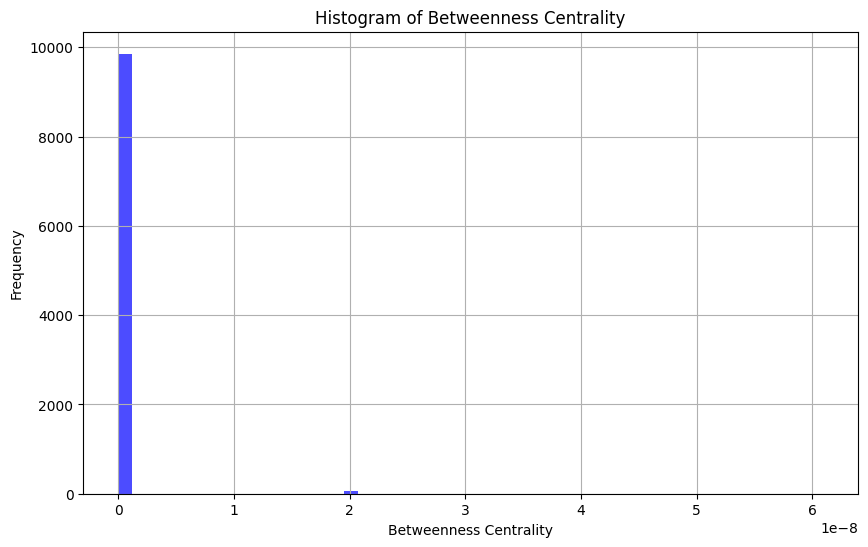

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality.values(), bins=50, color='blue', alpha=0.7)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Betweenness Centrality')
plt.grid(True)
plt.show()

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

# Get the top 10 nodes with the highest closeness centrality
top_10_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 nodes and their closeness centrality values in a tabular format
df = pd.DataFrame(top_10_nodes, columns=['Node', 'Closeness Centrality'])
#print(closeness_centrality)
print(df)

     Node  Closeness Centrality
0  112517              0.000308
1   37152              0.000308
2  106993              0.000308
3   15584              0.000308
4   14212              0.000308
5   35575              0.000231
6   35715              0.000231
7  115350              0.000231
8    6975              0.000231
9   35574              0.000231


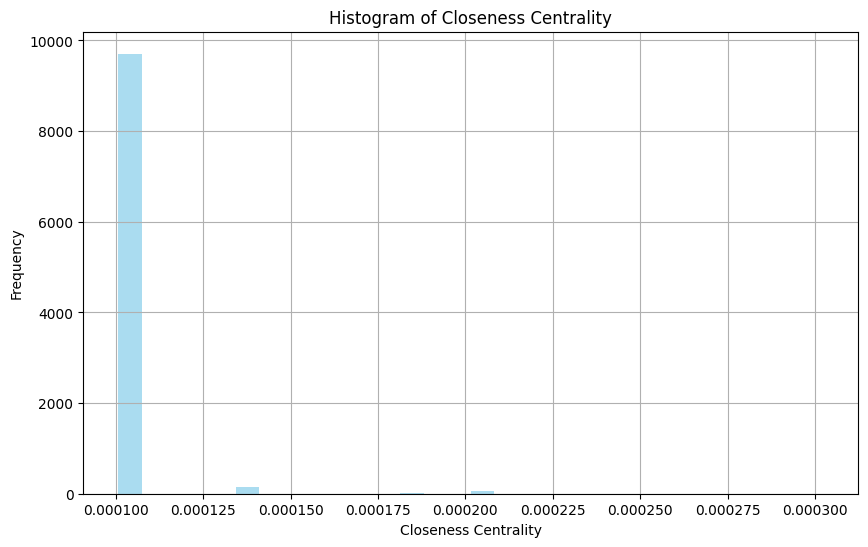

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(closeness_centrality.values(), bins=30, color='skyblue', alpha=0.7)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Histogram of Closeness Centrality')
plt.grid(True)
plt.show()

In [ ]:
transitivity = nx.transitivity(G)

print("Transitivity:", transitivity)

Transitivity: 0


In [ ]:
reciprocity = nx.reciprocity(G)

print("Reciprocity:", reciprocity)

Reciprocity: 0.0


In [6]:
# Function to assign random activation probabilities to edges
def assign_activation_probabilities(G):
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        probs = np.random.rand(len(neighbors))
        sum_probs = sum(probs)
        normalized_probs = probs / sum_probs
        for i, neighbor in enumerate(neighbors):
            G.edges[node, neighbor]['probability'] = normalized_probs[i]

# Function to simulate Independent Cascade Model (ICM)
def icm_simulation(G, seed_node):
    activated_nodes = set([seed_node])
    newly_activated = set([seed_node])
    steps = 0
    while newly_activated:
        steps += 1
        newly_activated_next = set()
        for node in newly_activated:
            for neighbor in G.neighbors(node):
                if neighbor not in activated_nodes:
                    probability = G.edges[node, neighbor]['probability']
                    if np.random.rand() < probability:
                        activated_nodes.add(neighbor)
                        newly_activated_next.add(neighbor)
        newly_activated = newly_activated_next
    return steps, len(activated_nodes)

# Function to repeat simulation starting from different seed nodes
def repeat_simulation(G, num_trials):
    max_nodes_reached_list = []
    for _ in range(num_trials):
        seed_node = np.random.choice(list(G.nodes()))
        steps, max_nodes_reached = icm_simulation(G, seed_node)
        max_nodes_reached_list.append(max_nodes_reached)
    return max_nodes_reached_list


# Assign random activation probabilities to edges
assign_activation_probabilities(G)

# Repeat simulation 10 times starting from different seed nodes
num_trials = 10
max_nodes_reached_list = repeat_simulation(G, num_trials)

# Calculate average number of steps required
print(max_nodes_reached_list)
average_max_nodes_reached = np.mean(max_nodes_reached_list)
print("Average Maximum Number of Nodes Reached:", average_max_nodes_reached)

[2, 2, 2, 2, 2, 2, 3, 2, 2, 2]
Average Maximum Number of Nodes Reached: 2.1
